# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

### Step 1

Load an image (any image that contains faces).

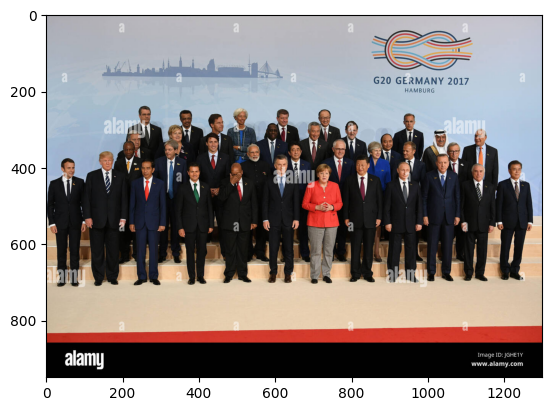

In [2]:
img = cv2.imread('./data/summit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img);

### Step 2

Load the dlib face predictor.

In [3]:
# Load the detector and shape predictor
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))

Number of detected faces: 22


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

805 382 36 36
241 390 36 36
301 342 36 36
45 390 36 36
1021 378 36 36
369 402 36 36
637 346 36 36
245 250 36 36
529 350 36 36
421 326 36 36
1117 402 36 36
141 374 36 36
1113 306 36 36
921 398 36 36
877 322 36 36
441 270 36 36
925 342 36 36
577 294 36 36
1217 394 36 36
709 406 36 36
325 302 36 36
753 342 36 36


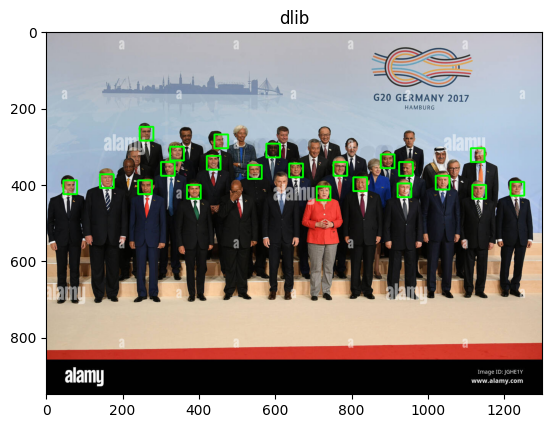

In [5]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])
    

plt.imshow(result_dlib), plt.title('dlib');

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

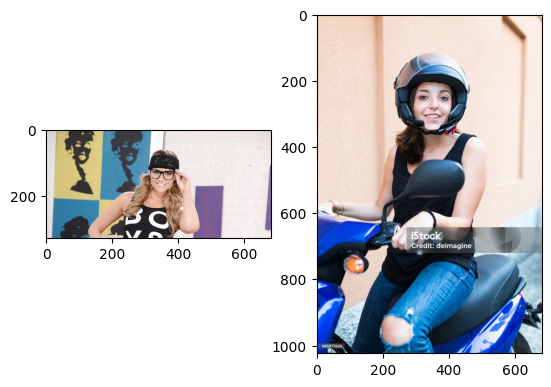

In [7]:
girl_in_glasses = cv2.imread('./data/girl_in_glasses.jpg')
girl_in_glasses = cv2.cvtColor(girl_in_glasses, cv2.COLOR_BGR2RGB)
girl_in_glasses_gray = cv2.cvtColor(girl_in_glasses, cv2.COLOR_RGB2GRAY)

girl_in_helmet = cv2.imread('./data/girl_in_helmet.jpg')
girl_in_helmet = cv2.cvtColor(girl_in_helmet, cv2.COLOR_BGR2RGB)
girl_in_helmet_gray = cv2.cvtColor(girl_in_helmet, cv2.COLOR_RGB2GRAY)

plt.subplot(121), plt.imshow(girl_in_glasses)
plt.subplot(122), plt.imshow(girl_in_helmet);

In [8]:
rects1 = detector(girl_in_glasses_gray, 1)
rects2 = detector(girl_in_helmet_gray, 1)

print('Number of detected faces:', len(rects1))
print('Number of detected faces:', len(rects2))

Number of detected faces: 1
Number of detected faces: 1


312 113 74 75
282 211 129 129


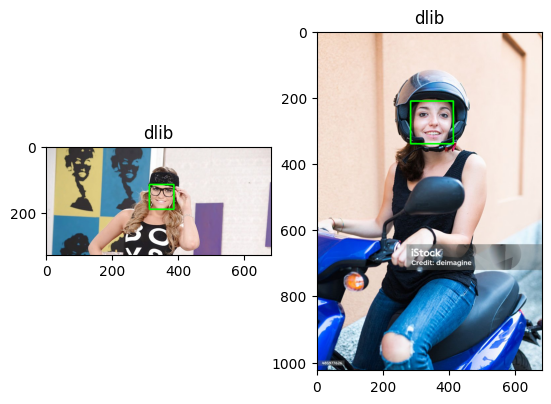

In [8]:
# Draw rectangle around each face
result_dlib1 = np.copy(girl_in_glasses)
result_dlib2 = np.copy(girl_in_helmet)

for rect in rects1:
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib1, (x, y), (x+w, y+h), (0, 255, 0), 3)

for rect in rects2:
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib2, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.subplot(121), plt.imshow(result_dlib1), plt.title('dlib')
plt.subplot(122), plt.imshow(result_dlib2), plt.title('dlib');